In [24]:
import operator 
import math 
import random 
import numpy as np 
from deap import algorithms, base, creator, tools, gp 

random.seed(7) 

def target_func(x):
    return 2 * x**3 - 3 * x**2 + 4 * x - 1
def eval_func(individual, points): 
    func = toolbox.compile(expr=individual) 
    mse = ((func(x) - target_func(x))**2 for x in points) 
    return (math.fsum(mse) / len(points),)

def division_operator(numerator, denominator): 
    if denominator == 0: 
        return 1 
    return numerator / denominator 

if not 'pset' in locals():
    pset = gp.PrimitiveSet("MAIN", 1) 
    pset.addPrimitive(operator.add, 2) 
    pset.addPrimitive(operator.sub, 2) 
    pset.addPrimitive(operator.mul, 2) 
    pset.addPrimitive(division_operator, 2) 
    pset.addPrimitive(operator.neg, 1) 
    pset.addPrimitive(math.cos, 1) 
    pset.addPrimitive(math.sin, 1) 
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1)) 
    pset.renameArguments(ARG0='x') 

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin) 

toolbox = base.Toolbox() 
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2) 
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
toolbox.register("compile", gp.compile, pset=pset) 

toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-10,10)]) 
toolbox.register("select", tools.selTournament, tournsize=3) 
toolbox.register("mate", gp.cxOnePoint) 
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2) 
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset) 
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17)) 
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
 
population = toolbox.population(n=450) 
hall_of_fame = tools.HallOfFame(1) 

stats_fit = tools.Statistics(lambda x: x.fitness.values) 
stats_size = tools.Statistics(len) 
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size) 
mstats.register("avg", np.mean) 
mstats.register("std", np.std) 
mstats.register("min", np.min) 
mstats.register("max", np.max) 

probab_crossover = 0.4 
probab_mutate = 0.2 
num_generations = 60 

population, log = algorithms.eaSimple(population, toolbox, 
        probab_crossover, probab_mutate, num_generations, 
        stats=mstats, halloffame=hall_of_fame, verbose=True) 

   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min    	nevals	std    	avg    	gen	max	min	nevals	std    
0  	450   	18.6918	0  	47.1923	7.39087	450   	6.27543	3.73556	0  	7  	2  	450   	1.62449
1  	251   	15.4572	1  	41.3823	4.46965	251   	4.54993	3.80222	1  	12 	1  	251   	1.81316
2  	236   	13.2545	2  	37.7223	4.46965	236   	4.06145	3.96889	2  	12 	1  	236   	1.98861
3  	251   	12.2299	3  	60.828 	4.46965	251   	4.70055	4.19556	3  	12 	1  	251   	1.9971 
4  	235   	11.001 	4  	47.1923	4.46965	235   	4.48841	4.84222	4  	13 	1  	235   	2.17245
5  	229   	9.44483	5  	31.478 	4.46965	229   	3.8796 	5.56   	5  	19 	1  	229   	2.43168
6  	225   	8.35975	6  	22.0546	3.02133	225   	3.40547	6.38889	6  	15 	1  	225   	2.40875
7  	237   	7.99309	7  	31.1356	1.81133	237   	4.08463	7.14667	7  	16 	1  	

In [25]:
print(hall_of_fame[0])

add(add(sub(add(add(sin(x), division_operator(x, cos(x))), add(x, x)), 1), x), neg(mul(x, sub(add(x, add(x, sub(cos(sub(0, x)), sub(0, x)))), mul(x, x)))))


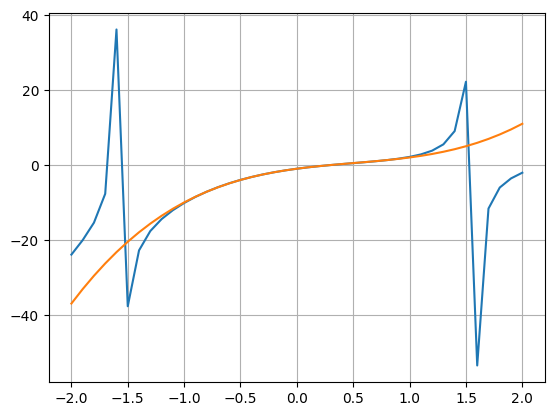

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
f = toolbox.compile(expr=hall_of_fame[0])
xs = [x/10.0 for x in range(-20, 21)]
ys = [f(x) for x in xs]
ts = [target_func(x) for x in xs]
plt.figure()
plt.plot(xs, ys)
plt.plot(xs, ts)
plt.grid(True)
plt.show()